In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
digits = datasets.load_digits()
dataSet, labelSet = digits.data, digits.target
dataSet = StandardScaler().fit_transform(dataSet)
labelSet = (labelSet > 4).astype(np.int)

<ipython-input-2-740f22b21e7a>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labelSet = (labelSet > 4).astype(np.int)


C=100.00
Sparsity with L1 penalty: 4.69%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9104
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8620
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8920


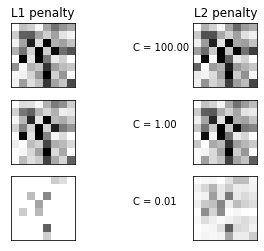

In [5]:
for i, C in enumerate((100, 1, 0.01)):
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', solver='liblinear', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(dataSet, labelSet)
    clf_l2_LR.fit(dataSet, labelSet)

    coef_l1_LR = clf_l1_LR.coef_.ravel()  # 由于 L1 稀疏诱导规范，coef_l1_LR 包含零
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(dataSet, labelSet))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(dataSet, labelSet))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                       cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                       cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()